<a href="https://colab.research.google.com/github/bankadilasha11/MACHINE-LEARNING/blob/master/stockplotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df=web.DataReader('AAPL',data_source='yahoo',start='2015-01-01',end='2020-09-10')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,99.766006
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,96.955429
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,96.964584
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,98.324242
2015-01-08,112.150002,108.699997,109.230003,111.889999,59364500.0,102.102089
...,...,...,...,...,...,...
2020-08-03,446.549988,431.570007,432.799988,435.750000,77037800.0,434.965759
2020-08-04,443.160004,433.549988,436.529999,438.660004,43267900.0,437.870514
2020-08-05,441.570007,435.589996,437.510010,440.250000,30498000.0,439.457642


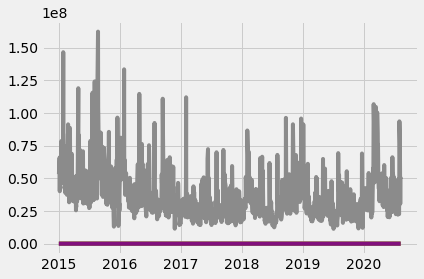

In [ ]:
plt.plot(df)
plt.show()

In [ ]:
df.shape

(1410, 6)

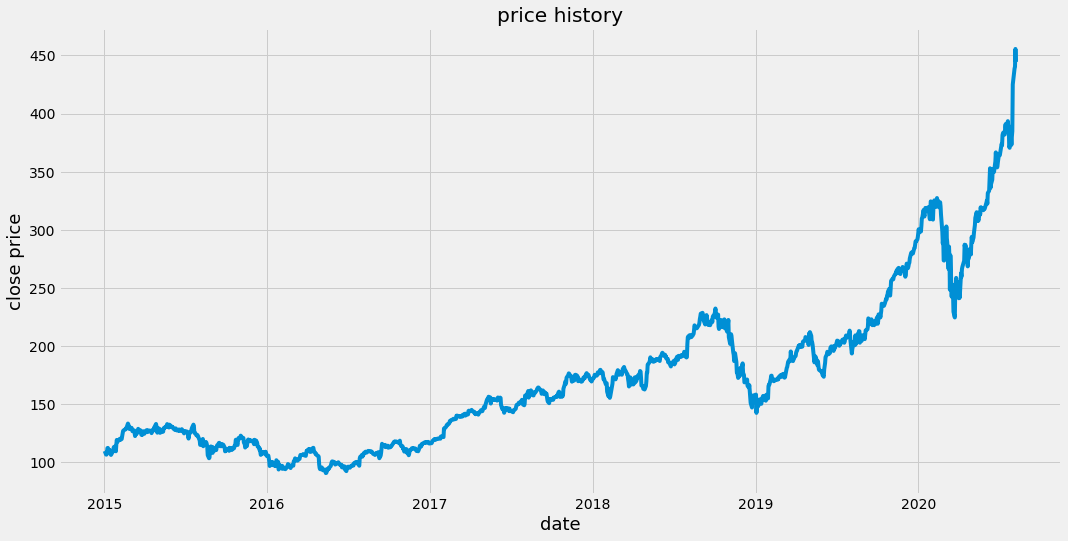

In [ ]:
plt.figure(figsize=(16,8))
plt.title("price history")
plt.plot(df['Close'])
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.show()

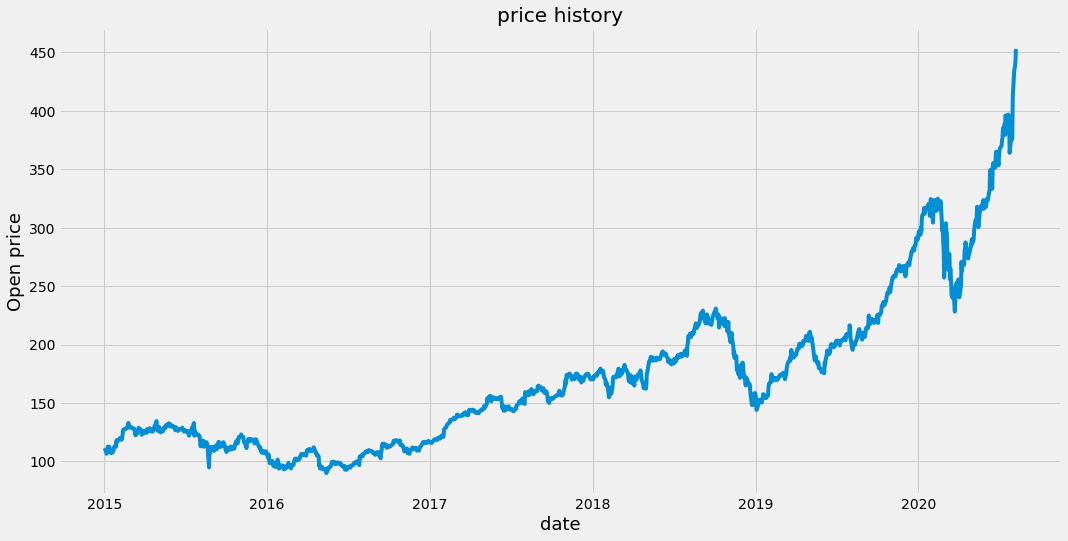

In [ ]:
plt.figure(figsize=(16,8))
plt.title("price history")
plt.plot(df['Open'])
plt.xlabel('date',fontsize=18)
plt.ylabel('Open price',fontsize=18)
plt.show()

In [ ]:
data=df.filter(['Close'])
dataset=data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1128

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(dataset)
scaler_data

array([[0.05198896],
       [0.04355683],
       [0.04358422],
       ...,
       [0.95794895],
       [1.        ],
       [0.96944733]])

In [ ]:
train_data=scaler_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i <= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.05198896, 0.04355683, 0.04358422, 0.04766338, 0.05899746,
       0.059326  , 0.05176994, 0.05442551, 0.05327568, 0.04511732,
       0.04284502, 0.05031896, 0.05259125, 0.0603937 , 0.06198157,
       0.06231008, 0.05146879, 0.0683604 , 0.07818875, 0.07342516,
       0.07744956, 0.07750433, 0.07999563, 0.08103597, 0.07827088,
       0.08043367, 0.08673037, 0.09456019, 0.09888577, 0.10058315,
       0.10263642, 0.10507298, 0.10433379, 0.10720838, 0.11679033,
       0.11451804, 0.10526459, 0.10972706, 0.10436119, 0.10608591,
       0.1068251 , 0.10458017, 0.09874889, 0.09926904, 0.1007474 ,
       0.09354726, 0.08733266, 0.09338298, 0.09102856, 0.09475183,
       0.10047364, 0.10438855, 0.10173298, 0.09735266, 0.10093904,
       0.09951545, 0.09045364, 0.09280807, 0.09009775, 0.09863938])]
[0.09332823662665918]

[array([0.05198896, 0.04355683, 0.04358422, 0.04766338, 0.05899746,
       0.059326  , 0.05176994, 0.05442551, 0.05327568, 0.04511732,
       0.04284502, 0.05031896, 0.05

In [ ]:
x_train.shape

(1068, 60, 1)

In [ ]:
y_train.shape

(1068,)

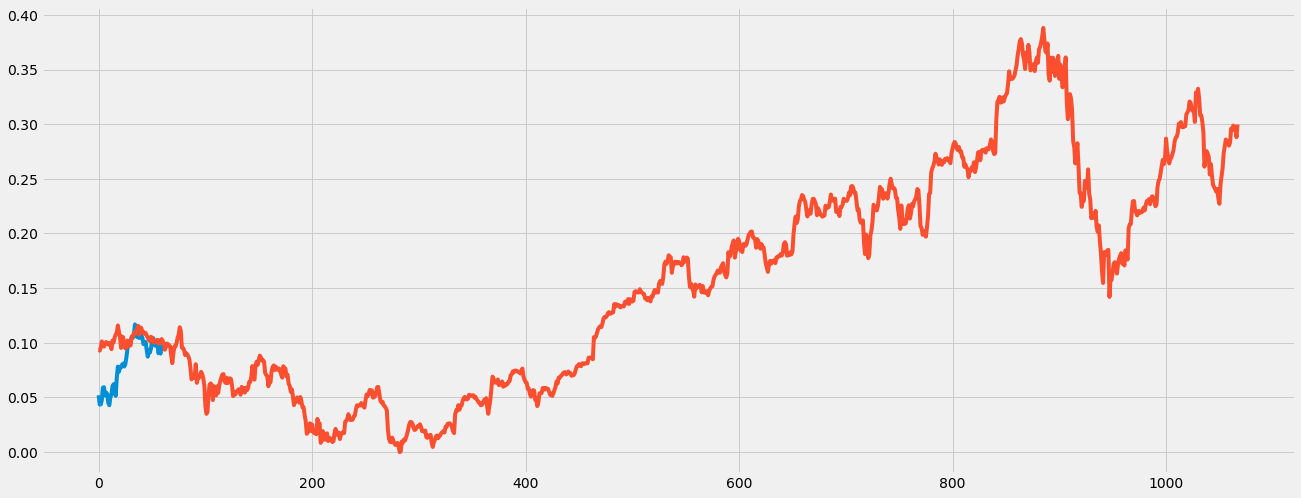

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(x_train[0])
plt.plot(y_train)
plt.show()

In [ ]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1068, 60, 1)